Creating a comprehensive Markdown document to detail the data science process for the Kaggle housing prices competition is a great way to document and share your workflow. Here's an outline of what such a document might look like, including code snippets and explanations for each step. Remember, the actual code and analysis will depend on the specific dataset and your approach to the problem.

---

# Data Science Process on Kaggle's Housing Prices Competition

## Introduction
This document outlines the data science process applied to the Kaggle Housing Prices Competition. We aim to predict housing prices based on various features using Python and Scikit-Learn.

## 1. Data Preparation
First, we load and prepare the data for analysis and modeling.

```python
import pandas as pd

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Basic data cleaning
# Handling missing values, incorrect data types, etc.
```

### Exploratory Data Analysis (EDA)
Perform initial EDA to understand the data better.

```python
# Code for EDA: plotting distributions, checking for outliers, etc.
```

## 2. Baseline Model
We establish a baseline model to compare future models against.

### Model Selection
For the baseline, a simple linear regression model is used.

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing data for baseline model
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluating the baseline model
baseline_predictions = baseline_model.predict(X_test)
baseline_rmse = mean_squared_error(y_test, baseline_predictions, squared=False)
```

## 3. Feature Engineering
Enhance the model by adding more features and using feature engineering techniques.

### Adding New Features
We add new features that might be relevant to the housing prices.

```python
# Code for feature engineering: creating new features, combining features, etc.
```

### Re-training the Model
Re-train the model with the new features.

```python
# Code for re-training the model with new features
```

## 4. Model Improvement
Compare the performance of the enhanced model with the baseline model.

### Evaluation
We evaluate the improved model and compare its performance to the baseline.

```python
# Code for evaluating the improved model
improved_predictions = improved_model.predict(X_test)
improved_rmse = mean_squared_error(y_test, improved_predictions, squared=False)

# Comparing with the baseline
print("Baseline RMSE:", baseline_rmse)
print("Improved RMSE:", improved_rmse)
```

## Conclusion
Summarize the improvements and any insights gained from this process.

---

This Markdown document serves as a template. You'll need to fill in the code and analysis parts based on the specifics of your dataset and the approaches you choose to employ.

# The Process in Python Script Form
You can also create a Python script that performs the entire data science process from start to finish. This is useful for automating the process and making it easier to reproduce your results.

1. Loads the training dataset from the Kaggle Housing Prices competition.
2. Encodes categorical variables.
3. Handles missing values.
4. Deals with outliers in the 'LotArea' feature.
5. Trains a Random Forest model on the cleaned training data.
6. Loads the test set.
7. Makes predictions using the trained model, ready for submission to Kaggle.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv')

In [ ]:
# Load the test data
# test_data = pd.read_csv('test.csv')
# test_data_original = test_data.copy()  # Copy to preserve original IDs

# # Stage 1: Handle Missing Values
# # Impute missing values in the test data
# for col in test_data.columns:
#     if test_data[col].isnull().any():
#         imputer = SimpleImputer(strategy='median' if test_data[col].dtype in ['int64', 'float64'] else 'most_frequent')
#         test_data[col] = imputer.fit_transform(test_data[[col]])

# # Stage 2: Encode Categorical Variables
# # Repeat preprocessing for test data
# test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=False)
# test_data = test_data.reindex(columns = X.columns, fill_value=0)


# # Make predictions on the test data
# predictions = model.predict(test_data)

# # Prepare submission file
# submission = pd.DataFrame({
#     'Id': test_data_original['Id'],
#     'SalePrice': predictions
# })



In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the training data
train_data = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv')

# Stage 1: Encode Categorical Variables
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']

# Applying One-Hot Encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_vars = onehot_encoder.fit_transform(train_data[categorical_cols])
encoded_vars_df = pd.DataFrame(encoded_vars, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded variables
train_data = train_data.drop(categorical_cols, axis=1)
train_data = pd.concat([train_data, encoded_vars_df], axis=1)

# Stage 2: Handle Missing Values
# Imputing missing values for numerical and categorical data
for col in train_data.columns:
    if train_data[col].isnull().any():
        imputer = SimpleImputer(strategy='median' if train_data[col].dtype in ['int64', 'float64'] else 'most_frequent')
        train_data[col] = imputer.fit_transform(train_data[[col]])

# Stage 3: Deal with Outliers in 'LotArea'
Q1 = train_data['LotArea'].quantile(0.25)
Q3 = train_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
train_data = train_data[(train_data['LotArea'] >= lower_bound) & (train_data['LotArea'] <= upper_bound)]

# Preparing data for Random Forest model
X = train_data.drop(['SalePrice', 'Id'], axis=1)  # Assuming 'SalePrice' is the target and 'Id' is an identifier
y = train_data['SalePrice']

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# Load the test data
test_data = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\test.csv')
test_data_original = test_data.copy()  # Copy to preserve original IDs

# Repeat preprocessing for test data
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)
test_data = test_data.reindex(columns = X.columns, fill_value=0)

# Impute missing values in the test data
for col in test_data.columns:
    if test_data[col].isnull().any():
        imputer = SimpleImputer(strategy='median' if test_data[col].dtype in ['int64', 'float64'] else 'most_frequent')
        test_data[col] = imputer.fit_transform(test_data[[col]])

# Make predictions on the test data
predictions = model.predict(test_data)

# Prepare submission file
submission = pd.DataFrame({
    'Id': test_data_original['Id'],
    'SalePrice': predictions
})

# Save submission file
submission.to_csv('submission_stage1-3.csv', index=False)


In [ ]:
model

RandomForestRegressor(random_state=0)

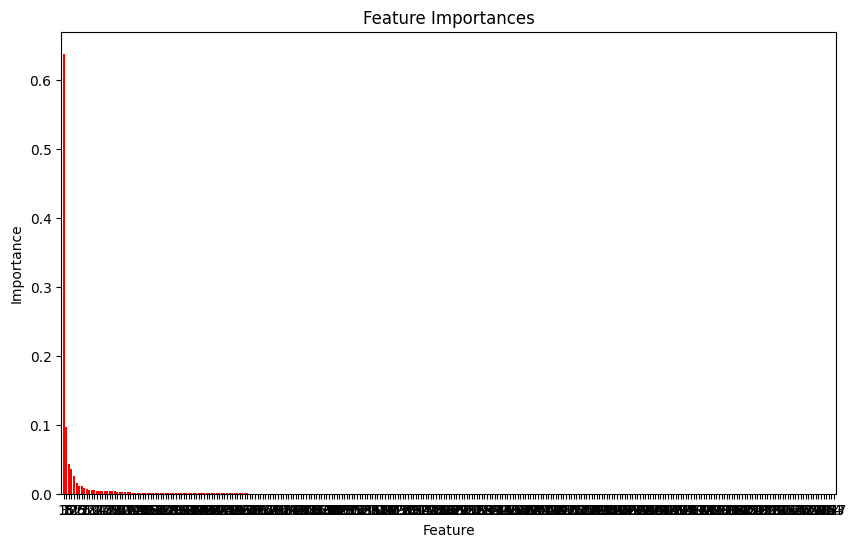

In [ ]:
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [ ]:
pd.options.display.max_rows = 4000
features_df = pd.DataFrame(zip(importances, X.columns), columns=['importance', 'feature'])[['feature', 'importance']].sort_values(by='importance', ascending=False)
features_df.head(20)

,feature,importance
3,OverallQual,0.637822
15,GrLivArea,0.096029
8,BsmtFinSF1,0.042811
11,TotalBsmtSF,0.036149
12,1stFlrSF,0.025389
26,GarageArea,0.015481
25,GarageCars,0.011291
5,YearBuilt,0.010513
2,LotArea,0.008456
6,YearRemodAdd,0.006872


<Axes: >

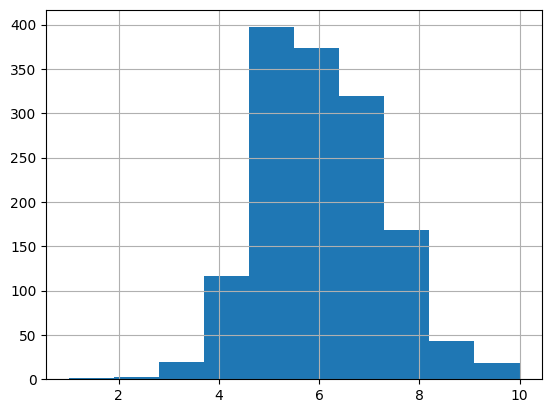

In [ ]:
df['OverallQual'].hist(bins=10)

In [ ]:
# df[['OverallQual', 'SalePrice']].groupby('OverallQual').mean().sort_values(by='SalePrice', ascending=False)
df[['OverallQual', 'SalePrice']].groupby("OverallQual").mean().sort_values(by='SalePrice', ascending=False)

,SalePrice
OverallQual,
10,438588.388889
9,367513.023256
8,274735.535714
7,207716.423197
6,161603.034759
5,133523.347607
4,108420.655172
3,87473.750000
2,51770.333333


In [ ]:
def one_hot_encode(df, columns):
    """
    Apply OneHotEncoding to the specified columns of a dataframe.

    Args:
    df (pd.DataFrame): The original dataframe.
    columns (list): List of columns to be one-hot encoded.

    Returns:
    pd.DataFrame: A dataframe with one-hot encoded columns.
    """
    # Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Apply OneHotEncoder to the specified columns
    for col in columns:
        # Transform the column
        encoded_data = encoder.fit_transform(df[[col]])

        # Create a dataframe from the encoded data
        encoded_df = pd.DataFrame(encoded_data, columns=[f"{col}_{value}" for value in encoder.categories_[0]])

        # Drop the original column and concatenate the new one
        df = df.drop(col, axis=1).join(encoded_df)

    return df


import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_feature_importance(df, model, top_n):
    """
    Plot the top N feature importances of a model.

    Args:
    df (pd.DataFrame): The dataframe used to train the model.
    model: The trained model with feature importance attribute.
    top_n (int): Number of top features to display.

    Returns:
    None. Displays a plot of top N feature importances.
    """
    # Extract feature importances
    feature_importances = model.feature_importances_

    # Create a series with feature importances
    importances = pd.Series(feature_importances, index=df.columns)

    # Sort and select the top N importances
    importances_sorted = importances.sort_values(ascending=False)[:top_n]

    # Plot the top N feature importances
    plt.figure(figsize=(10, top_n * 0.5))  # Adjust the size based on number of features
    importances_sorted.plot(kind='barh', color='skyblue')
    plt.title(f'Top {top_n} Feature Importances')
    plt.show()


In [ ]:
# one_hot_encode(df, ['OverallQual'])

In [7]:
df = pd.read_csv(r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv')

# Stage 1: Handle Missing Values
for col in df.columns:
    if df[col].isnull().any():
        imputer = SimpleImputer(strategy='median' if df[col].dtype in ['int64', 'float64'] else 'most_frequent')
        df[col] = imputer.fit_transform(df[[col]])

# Stage 2: Encode Categorical Variables
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols.append('OverallQual')
df = one_hot_encode(df, categorical_cols)



y_col = 'SalePrice'

cols = df.columns.drop(y_col)


model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(df[cols], df[y_col])
cv_scores = cross_val_score(model, df[cols], df[y_col], cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}")
# model.fit(df[cols], df[y_col])

ValueError: 2

In [8]:
pd.DataFrame(zip(model.feature_importances_, cols), columns=['importance', 'feature']).sort_values(by='importance', ascending=False).head(20)

NameError: name 'cols' is not defined

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(df[cols], df[y_col])


KeyError: "['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 'OverallQual_1', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'GarageCars_0', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'price_per_sqft'] not in index"

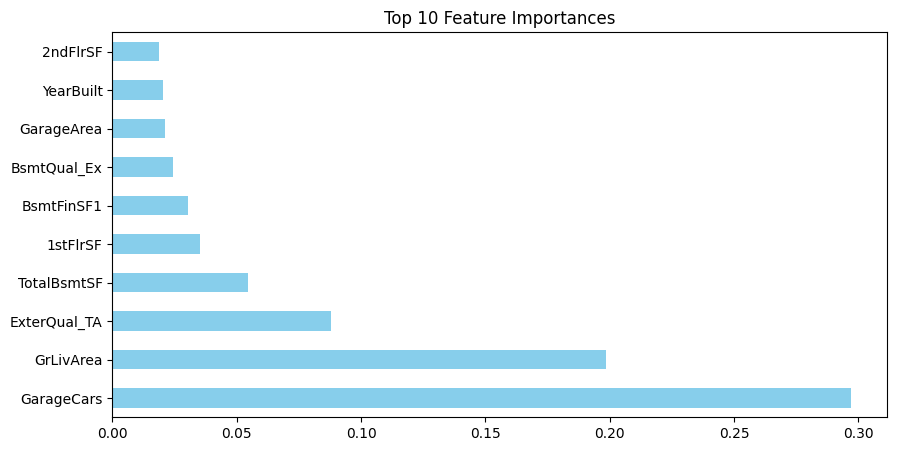

In [ ]:
plot_top_feature_importance(df[cols], model, 10)
# pd.DataFrame(zip(cols , model.feature_importances_), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

In [ ]:
df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [ ]:
df = pd.read_csv('train.csv')

# Stage 1: Handle Missing Values
for col in df.columns:
    if df[col].isnull().any():
        imputer = SimpleImputer(strategy='median' if df[col].dtype in ['int64', 'float64'] else 'most_frequent')
        df[col] = imputer.fit_transform(df[[col]])

# Stage 2: Encode Categorical Variables
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols.extend(['OverallQual','GarageCars'])
df = one_hot_encode(df, categorical_cols)

y_col = 'SalePrice'

cols = df.columns.drop(y_col)


model = RandomForestRegressor(n_estimators=100, random_state=0)
cv_scores = cross_val_score(model, df[cols], df[y_col], cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}")
model.fit(df[cols], df[y_col])

Cross-validation scores: [0.87732046 0.79468095 0.86761311 0.88269121 0.85350591], scores average: (0.8551623276300543, 'std: ', 0.0318263583982845)


RandomForestRegressor(random_state=0)

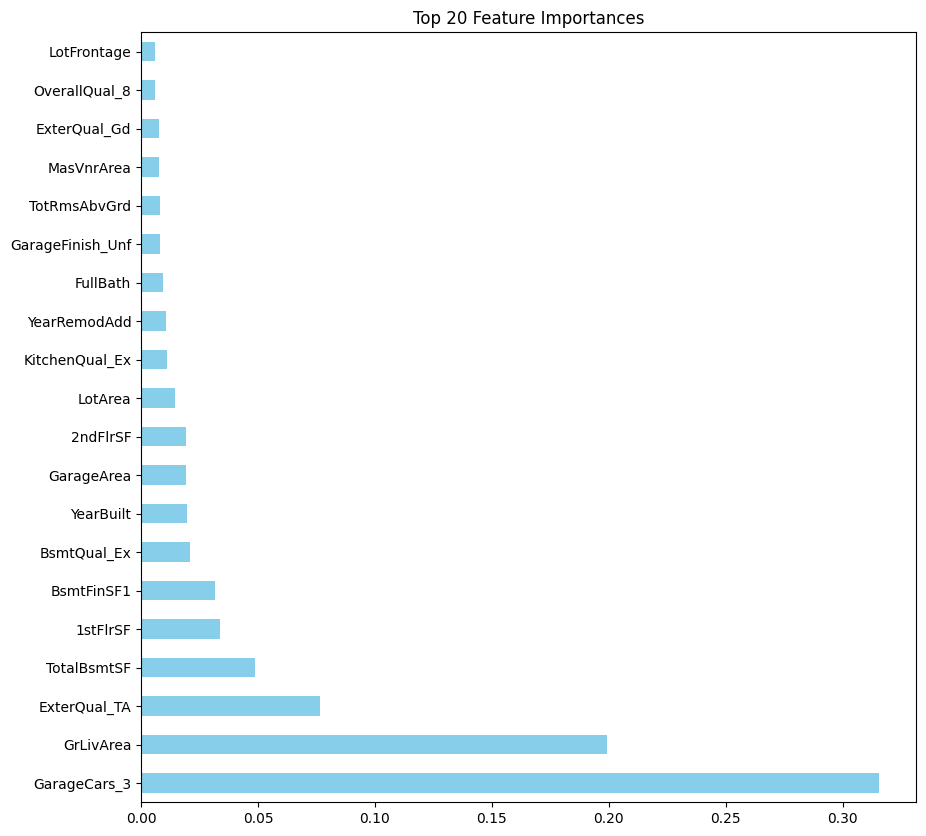

In [ ]:
plot_top_feature_importance(df[cols], model, 20)

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

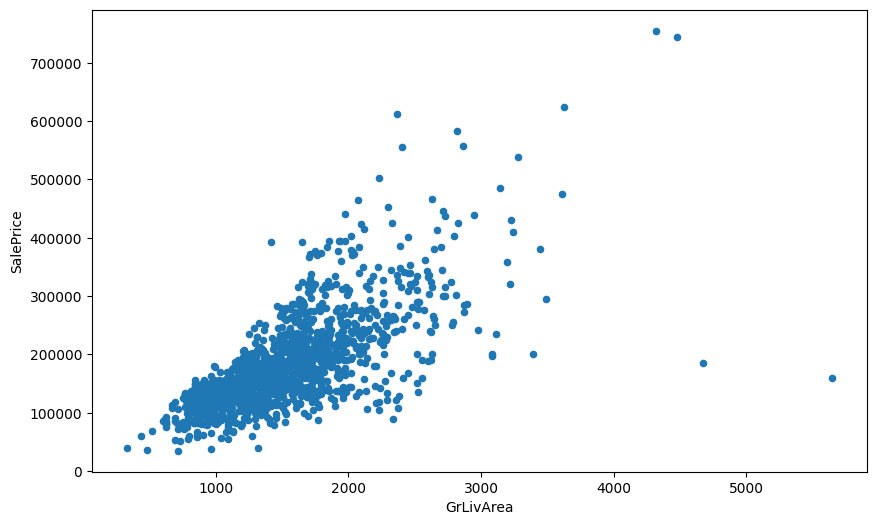

In [ ]:
df[['GrLivArea','SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', figsize=(10, 6))

In [ ]:
df['price_per_sqft'] = df['SalePrice'] / df['GrLivArea']



In [ ]:

y_col = 'SalePrice'

cols = df.columns.drop(y_col)


model = RandomForestRegressor(n_estimators=100, random_state=0)
cv_scores = cross_val_score(model, df[cols], df[y_col], cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}")
model.fit(df[cols], df[y_col])

Cross-validation scores: [0.97223479 0.9048065  0.94411454 0.96599199 0.94039756], scores average: (0.9455090759063571, 'std: ', 0.023742725753933578)


RandomForestRegressor(random_state=0)

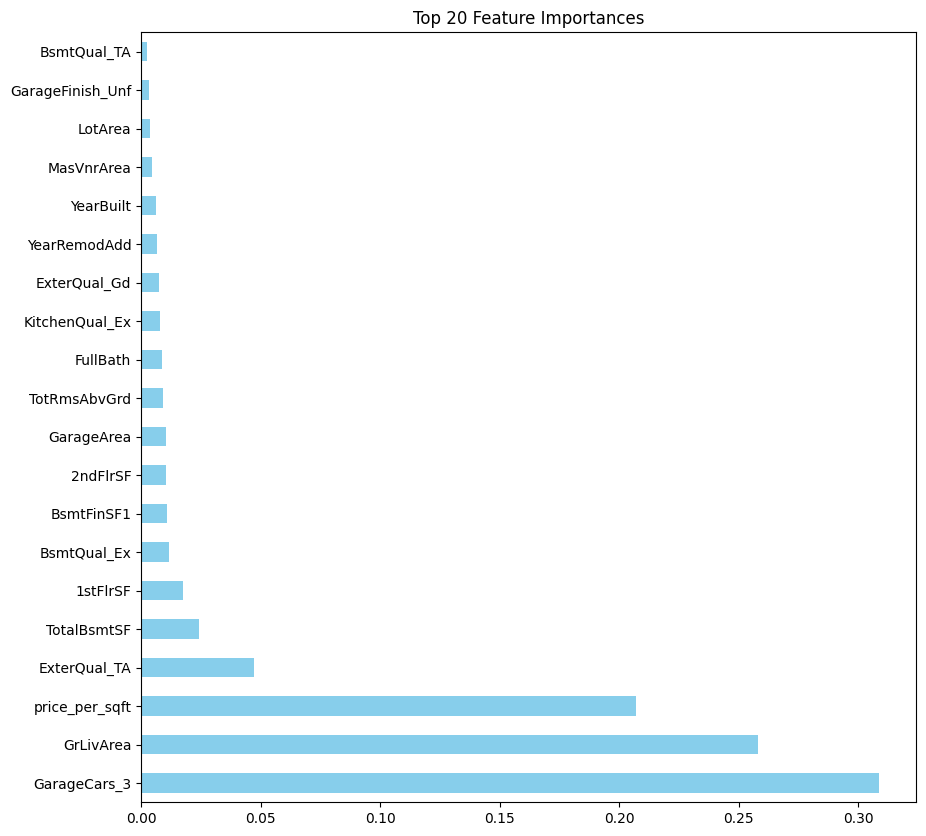

In [ ]:
plot_top_feature_importance(df[cols], model, 20)

In [ ]:
cols_importance = pd.DataFrame(zip(cols , model.feature_importances_), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)
new_cols = cols_importance[:80]['feature'].values

In [ ]:
# all_cols = df.columns.drop(y_col)


model = RandomForestRegressor(n_estimators=100, random_state=0)
cv_scores = cross_val_score(model, df[new_cols], df[y_col], cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}")
model.fit(df[cols], df[y_col])

Cross-validation scores: [0.9721614  0.90192893 0.94786434 0.9693806  0.94742967], scores average: (0.9477529877492687, 'std: ', 0.025153472041677512)


RandomForestRegressor(random_state=0)

In [ ]:
cross_val_score(model, df[new_cols], df[y_col], cv=5, scoring='neg_mean_squared_error')

array([-1.54020682e+08, -6.44392639e+08, -3.95073492e+08, -1.55113416e+08,
       -3.52503494e+08])

<AxesSubplot: >

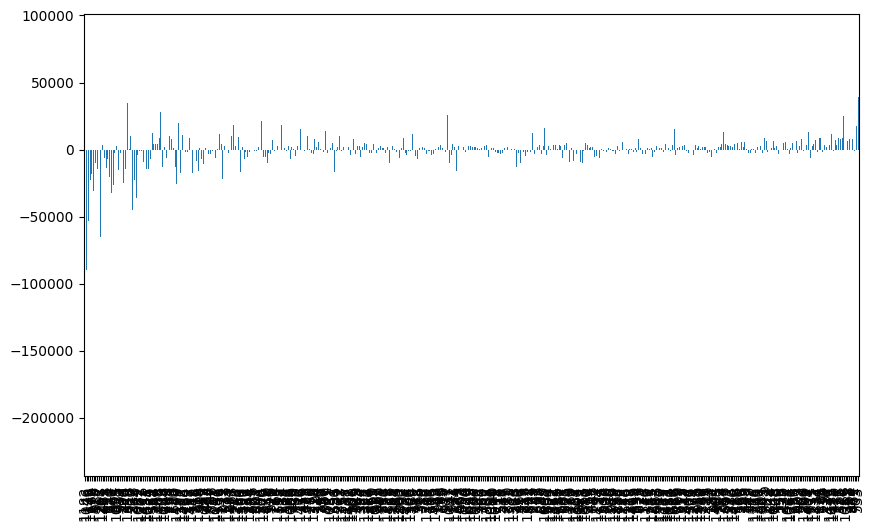

In [ ]:
test_ind = df.sample(frac=0.3).index
train_ind = df.index.drop(test_ind)

model.fit(df.loc[train_ind, new_cols], df.loc[train_ind, y_col])
predicted = model.predict(df.loc[test_ind, new_cols])
actual = df.loc[test_ind, y_col]

pred = pd.DataFrame(predicted, index=test_ind,columns=['predicted'])
pred['actual'] = actual
pred['errors'] = predicted - actual
pred['abs_errors'] = (predicted - actual).abs()
pred[['actual','errors']].sort_values(by='actual', ascending=False)['errors'].plot(kind='bar', figsize=(10, 6))
